<a href="https://colab.research.google.com/github/nguyenhuuhoang3697/Logistic-Regression-from-scratch/blob/main/Run_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Building Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
run '/content/drive/MyDrive/Môn tối ưu hóa/Thuyết trình lần 2/main.py'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# Predict probabilities
y_pred = model.predict(X_test_processed)
y_pred_prob = model.predict_proba(X_test_processed)[:, 1]

# Calculate the initial loss
initial_loss = log_loss(y_test, y_pred_prob)
print(f'Initial Loss (sklearn model): {initial_loss}')
print(classification_report(y_test, y_pred))

Initial Loss (sklearn model): 0.5201889859203586
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      6538
           1       0.76      0.80      0.78      8652

    accuracy                           0.75     15190
   macro avg       0.74      0.74      0.74     15190
weighted avg       0.75      0.75      0.75     15190



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Logistic Regression using Gradient Descent with Loss Tracking
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m
            self.coef_ += self.learning_rate * gradient

            # Calculate and record loss
            loss = log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Pure Newton's Method with Loss Tracking
class LogisticRegressionNewtonPure:
    def __init__(self, max_iter=100, tol=1e-6):
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            delta = np.linalg.solve(H, gradient)
            self.coef_ -= delta

            # Calculate and record loss
            loss = log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Newton's Method with Fixed Step Size with Loss Tracking
class LogisticRegressionNewtonFixedStep:
    def __init__(self, step_size=0.1, max_iter=100, tol=1e-6):
        self.step_size = step_size
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Update with fixed step size
            delta = np.linalg.solve(H, gradient)
            self.coef_ -= self.step_size * delta

            # Calculate and record loss
            loss = log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Logistic Regression using Newton's Method with Backtracking Line Search with Loss Tracking
class LogisticRegressionNewtonBacktracking:
    def __init__(self, alpha=0.3, beta=0.8, max_iter=100, tol=1e-6):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.tol = tol

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.loss_history = []
        m = X.shape[0]

        for _ in range(self.max_iter):
            predictions = self.sigmoid(np.dot(X, self.coef_))
            error = y - predictions
            gradient = np.dot(X.T, error) / m

            W = np.diag(predictions * (1 - predictions))
            H = -np.dot(np.dot(X.T, W), X) / m

            # Backtracking Line Search
            delta = np.linalg.solve(H, gradient)
            t = 1
            loss = log_loss(y, self.sigmoid(np.dot(X, self.coef_)))

            while t > 1e-10:
                new_coef = self.coef_ - t * delta
                new_loss = log_loss(y, self.sigmoid(np.dot(X, new_coef)))
                if new_loss < loss - self.alpha * t * np.dot(gradient, delta):
                    break
                t *= self.beta

            self.coef_ -= t * delta

            # Calculate and record loss
            loss = log_loss(y, self.sigmoid(np.dot(X, self.coef_)))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.coef_)) >= 0.5

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.coef_))

In [ ]:
# Log Loss function built from scratch
def log_loss(y_true, y_pred_proba):
    epsilon = 1e-15  # To avoid log(0)
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    m = len(y_true)
    return -np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)) / m

In [ ]:
# Gradient Descent Implementation
gd_model = LogisticRegressionGD(learning_rate=0.01, max_iter=10000)
start_time = time.time()
gd_model.fit(X_train_processed, y_train)
gd_train_time = time.time() - start_time
gd_train_predictions = gd_model.predict(X_test_processed)
gd_train_proba = gd_model.predict_proba(X_test_processed)
gd_train_loss = log_loss(y_test, gd_train_proba)

In [ ]:
# Pure Newton's Method Implementation
newton_pure_model = LogisticRegressionNewtonPure(max_iter=10)
start_time = time.time()
newton_pure_model.fit(X_train_processed, y_train)
newton_pure_train_time = time.time() - start_time
newton_pure_train_predictions = newton_pure_model.predict(X_test_processed)
newton_pure_train_proba = newton_pure_model.predict_proba(X_test_processed)
newton_pure_train_loss = log_loss(y_test, newton_pure_train_proba)

In [ ]:
# Newton's Method with Fixed Step Size Implementation
newton_fixed_step_model = LogisticRegressionNewtonFixedStep(step_size=0.1, max_iter=10)
start_time = time.time()
newton_fixed_step_model.fit(X_train_processed, y_train)
newton_fixed_step_train_time = time.time() - start_time
newton_fixed_step_train_predictions = newton_fixed_step_model.predict(X_test_processed)
newton_fixed_step_train_proba = newton_fixed_step_model.predict_proba(X_test_processed)
newton_fixed_step_train_loss = log_loss(y_test, newton_fixed_step_train_proba)

In [ ]:
# Newton's Method with Backtracking Line Search Implementation
newton_backtracking_model = LogisticRegressionNewtonBacktracking(alpha=0.3, beta=0.8, max_iter=10)
start_time = time.time()
newton_backtracking_model.fit(X_train_processed, y_train)
newton_backtracking_train_time = time.time() - start_time
newton_backtracking_train_predictions = newton_backtracking_model.predict(X_test_processed)
newton_backtracking_train_proba = newton_backtracking_model.predict_proba(X_test_processed)
newton_backtracking_train_loss = log_loss(y_test, newton_backtracking_train_proba)

In [ ]:
# scikit-learn Implementation
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
sklearn_model = SklearnLogisticRegression(solver='newton-cg', max_iter=100, random_state=42)
start_time = time.time()
sklearn_model.fit(X_train_processed, y_train)
sklearn_train_time = time.time() - start_time
sklearn_train_predictions = sklearn_model.predict(X_test_processed)
sklearn_train_proba = sklearn_model.predict_proba(X_test_processed)[:, 1]  # Get probabilities for the positive class
sklearn_train_loss = log_loss(y_test, sklearn_train_proba)

In [ ]:
# Create DataFrame to display results
results = pd.DataFrame({
    'Method': ['Gradient Descent', 'Newton\'s Method', 'scikit-learn'],
    'Time (s)': [gd_train_time, newton_train_time, sklearn_train_time],
    'Loss': [gd_train_loss, newton_train_loss, sklearn_train_loss],
    'Accuracy': [accuracy_score(y_test, gd_train_predictions),
                 accuracy_score(y_test, newton_train_predictions),
                 accuracy_score(y_test, sklearn_train_predictions)]
})

results

,Method,Time (s),Loss,Accuracy
0,Gradient Descent,188.612217,0.541697,0.732521
1,Newton's Method,95.600636,0.520498,0.748255
2,scikit-learn,6.956398,0.518240,0.748321


In [ ]:
results = pd.DataFrame({
    'Method': ['Newton\'s Pure', 'Newton\'s Fixed Step', 'Newton\'s Backtracking'],
    'Time (s)': [newton_pure_train_time, newton_fixed_step_train_time, newton_backtracking_train_time],
    'Loss': [newton_pure_train_loss, newton_fixed_step_train_loss, newton_backtracking_train_loss],
    'Accuracy': [accuracy_score(y_test, newton_pure_train_predictions),
                 accuracy_score(y_test, newton_fixed_step_train_predictions),
                 accuracy_score(y_test, newton_backtracking_train_predictions)]
})
results

,Method,Time (s),Loss,Accuracy
0,Newton's Pure,113.631949,0.518250,0.748255
1,Newton's Fixed Step,273.690395,0.551436,0.749111
2,Newton's Backtracking,96.963774,0.518250,0.748255


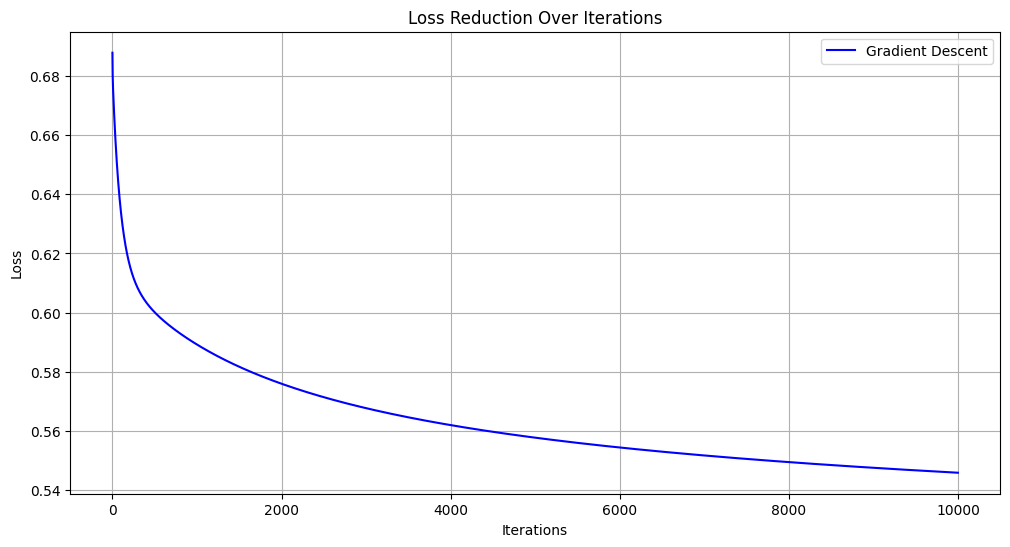

In [ ]:
# Plot loss reduction over iterations
plt.figure(figsize=(12, 6))

plt.plot(gd_model.loss_history, label='Gradient Descent', color='blue')
# plt.plot(newton_model.loss_history, label='Newton\'s Method', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

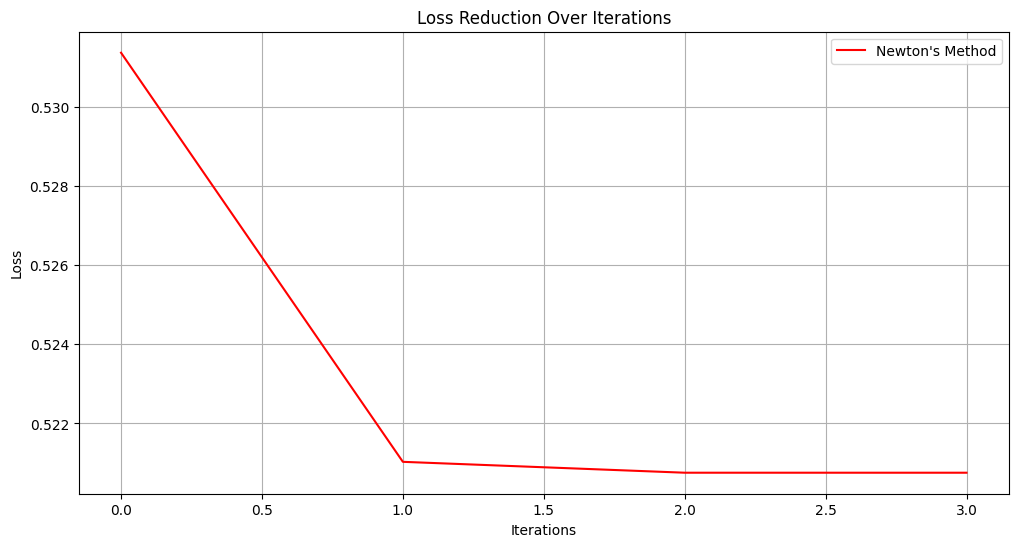

In [ ]:
# Plot loss reduction over iterations
plt.figure(figsize=(12, 6))

# plt.plot(gd_model.loss_history, label='Gradient Descent', color='blue')
plt.plot(newton_model.loss_history, label='Newton\'s Method', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

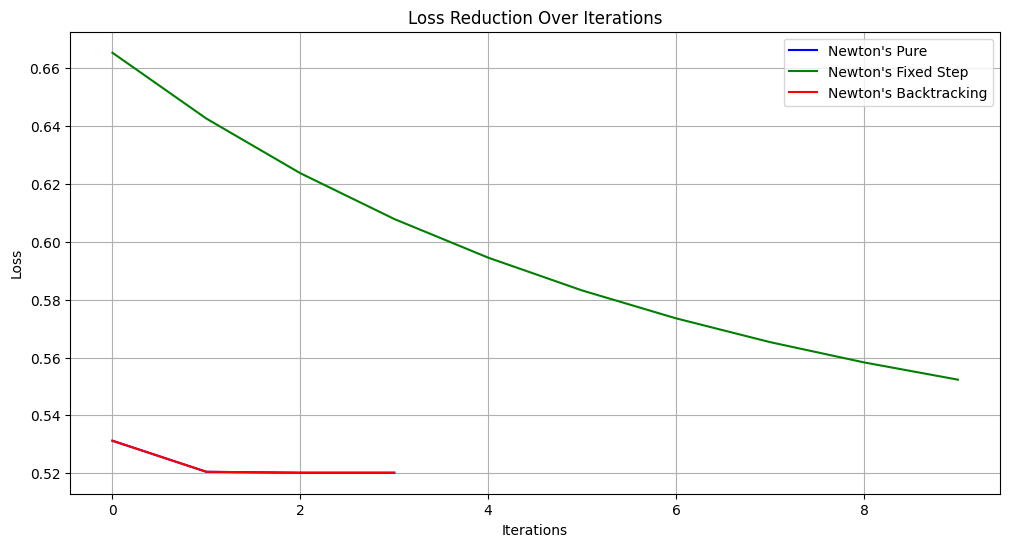

In [ ]:
# Plot loss reduction over iterations
plt.figure(figsize=(12, 6))

plt.plot(newton_pure_model.loss_history, label='Newton\'s Pure', color='blue')
plt.plot(newton_fixed_step_model.loss_history, label='Newton\'s Fixed Step', color='green')
plt.plot(newton_backtracking_model.loss_history, label='Newton\'s Backtracking', color='red')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction Over Iterations')
plt.legend()
plt.grid(True)
plt.show()